# Loading Data

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

X = load_boston().data
Y = load_boston().target

df=pd.DataFrame(X)
#some intuition
df[13]=df[10]//df[12]  #here we set a column 13 such that df[13]=Boston_data['Medv']//Boston_data['B']
X=df.as_matrix()


D:\Python1\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


# Train_test_split

In [64]:
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.33, random_state=7)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

df_X_train=pd.DataFrame(X_train)
#df_y_train=pd.DataFrame(y_train)
df_X_train['price']=y_train
print(df_X_train.head(5))


          0         1         2         3         4         5         6  \
0 -0.431024  2.569022 -1.267370 -0.282166 -1.340054  0.102435 -1.751328   
1 -0.431978 -0.477752 -1.235724 -0.282166 -0.564048  0.980322 -0.382070   
2  1.461914 -0.477752  1.014046 -0.282166  1.658151 -0.464389  0.672580   
3 -0.433089  0.436280 -0.778290 -0.282166 -0.996142 -0.377292 -1.704852   
4  0.772042 -0.477752  1.014046 -0.282166  1.243693  0.276630  1.062264   

          7         8         9        10        11        12        13  price  
0  1.935397 -0.474174 -0.253558 -1.649552  0.077328 -1.079907  0.408108   22.5  
1 -0.449103 -0.709354 -1.244803 -0.274700  0.424886 -1.070356  1.194179   37.2  
2 -0.930124  1.760030  1.596768  0.825181 -3.552132  2.883877 -1.164035    8.4  
3  1.452134 -0.591764 -0.944426 -0.732984  0.424886 -0.607801 -0.377963   23.4  
4 -0.975393  1.760030  1.596768  0.825181  0.365221  0.577923 -0.377963   13.1  


# Manual SGD

In [65]:
# batch_size should be selected as a multiple of 2 for good results


W=np.random.randn(1,14)
B=0
iteration=1000
lr_rate=0.01
k=32 #intialise W to random no and B to zero

while iteration>=0:
    w=W
    b=B
    temp_vectors=np.zeros(shape=(1,14))
    temp_intercept=0
    data=df_X_train.sample(32) #sampling random k=batch size=32 data
    x=np.array(data.drop('price',axis=1))
    y=np.array(data['price'])
    
    for i in range(k):
        temp_vectors+=(-2)*x[i]*(y[i]-(np.dot(w,x[i])+b))#partial differentiation wrt w dl/dw=1/k(-2x)*(y-wTx-b)
        temp_intercept+=(-2)*(y[i]-(np.dot(w,x[i])+b))#partial differentiation wrt b dl/db=1/k(-2)*(y-wTx-b)
        
    W=(w-lr_rate*(temp_vectors)/k)
    B=(b-lr_rate*(temp_intercept)/k)
    
    iteration=iteration-1
    
    
    
print(W)
print(B)

[[-0.96104483  0.27538426 -0.42490673  0.52134394 -1.83191539  3.29081001
   0.03691671 -2.5186672   1.565091   -1.1880337  -2.54848034  0.77607255
  -0.55935464  3.25967954]]
[22.72629834]


In [66]:
#prediction on x_test
#https://www.geeksforgeeks.org/numpy-asscalar-in-python/
y_predicted_lr=[]
for i in range(len(X_test)):
    val=np.dot(W,X_test[i])+B  #val= wTx+b
    y_predicted_lr.append(np.asscalar(val))

D:\Python1\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  


# Scatter plot of actual price vs Manually predicted price

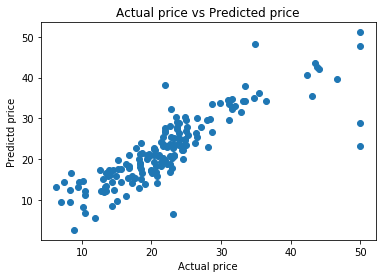

In [67]:
#Scatter plot of actual price vs predicted price

plt.scatter(y_test,y_predicted_lr)
plt.xlabel('Actual price')
plt.ylabel('Predictd price')
plt.title('Actual price vs Predicted price')
plt.show()

# Sklearn SGD

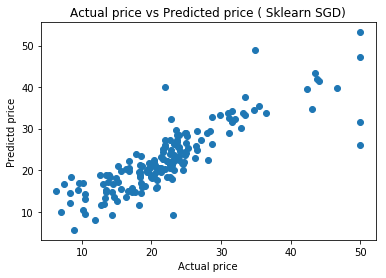

In [68]:

model=SGDRegressor(learning_rate='constant',eta0=0.01,penalty=None,max_iter=1000)
model.fit(X_train,y_train)
y_predicted_sgd=model.predict(X_test)

#Scatter plot of actual price vs predicted price

plt.scatter(y_test,y_predicted_sgd)
plt.xlabel('Actual price')
plt.ylabel('Predictd price')
plt.title('Actual price vs Predicted price ( Sklearn SGD)')
plt.show()

Manual SGD & Sklearn SGD scatter plots are similar.

# Mean_squared_error

In [69]:
print("Mean_squared_error_manual=",mean_squared_error(y_test,y_predicted_lr))
print("Mean_squared_error_SklearnSGD=",mean_squared_error(y_test,y_predicted_sgd))

Mean_squared_error_manual= 21.810527613818678
Mean_squared_error_SklearnSGD= 21.165342394475466


Mean_squared_error is approximately same with Manual and sklearn SGD